# Quantum state tomography

## 0. Background

In quantum computing, we need to perform various operations on quantum states to implement various quantum algorithms. Naturally, we want to know the exact form of the quantum state after various operations, and quantum state tomography can help us to achieve this goal. Quantum state tomography is a method of reconstructing quantum states by measurements, which can be used to identify unknown quantum states, evaluate the effects of quantum operations, etc. The basic principle is to repeatedly perform measurements using some specific operators on the systems with the same quantum states, and obtain an estimate of the measurement probability, and then determine the density matrix corresponding to the quantum states. Quantum state tomography can be used for both pure states and mixed states. In order to ensure that all the information of the quantum state can be contained, the operators used for measurement must form a complete set of bases in the Hilbert space.  
For example, for the pure state of a single qubit, it can be written as $|\psi\rangle =cos{\frac{\theta}{2}}|0\rangle + e^{i\phi} sin{\frac {\theta}{2}}|1\rangle$, which requires two parameters $\theta$ and $\phi$ to determine the quantum state, while for the mixed state of a single qubit, its density matrix has three independent parameters, and all three parameters need to be determined to determine the quantum state. Quantum state tomography can determine all the parameters mentioned above. Once the quantum state is determined, all the information it contains can also be determined, just like in statistical mechanics, knowing the partition function, various physical quantities can be derived from it.

## 1. Quantum state tomography

Quantum state tomography can be performed on a single qubit or multiple qubits. The situation of a single qubit is relatively simple, and we will derive and analyze it in detail, with a demonstration example by PyQuafu in the following text. For the situation of n qubits, we will directly give the conclusion, and interested readers can deduce it in the same way as a single qubit situation.

### 1.1. Quantum state tomography of a single qubit

The density matrix $\rho$ of a single qubit is a $2 \times 2 $ matrix. Since the identity matrix and the three Pauli matrices form a set of orthogonal bases in the Hilbert-Schmidt inner product, where 
$$
I=\begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix},\sigma_1=\sigma_X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix},\sigma_2=\sigma_Y=\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix},\sigma_3=\sigma_Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}, \tag{1}
$$
the density matrix $\rho$ can be decomposed as $\rho = cI + \sum\limits_{i=1}^3 c_i \sigma_i$. By $\begin{cases} tr(\rho)=1 \\ tr(I)=2 \\ tr(\sigma_i)=0 \end{cases}$, we have $c = \frac{1}{2}$. Combining the property of Pauli matrices $\sigma_i \sigma_j = \delta_{ij}I + i \epsilon_{ijk}\sigma_k$, we have $c_i=\frac{1}{2}tr(\sigma_i\rho)$. Therefore
$$
\rho = \frac{I}{2}+\frac{1}{2}\sum_{i=1}^3 tr(\rho\sigma_i) \sigma_i =\frac{I}{2}+\frac{1}{2}\sum_{i=1}^3 \lambda_i \sigma_i, \tag{2}
$$
where $\lambda_i=tr(\sigma_i\rho)$. Note that $\langle O \rangle_\rho=tr(O \rho)$, which is the expectation value of the observable $O$. Therefore, we can prepare many identical quantum states, and measure the observables $\sigma_i$ many times, and obtain an estimate of $\lambda_i$, and then achieve the quantum state tomography of a single qubit.  
In addition, in equation (2), when $\sum\limits_{i=1}^3 \lambda_i^2=1$, the quantum state is a pure state, and when $\sum\limits_{i=1}^3 \lambda_i^2 < 1$, the quantum state is a mixed state. Therefore, this decomposition can also be used to judge whether the quantum state is a pure state.

### 1.2. Quantum state tomography of n qubits

Similar to the single-qubit case, the density matrix of n qubits can be expanded as
$$
\rho = \sum_{\vec{v}}\frac{tr(\sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n} \, \rho) \, \sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n} }{2^n}, \tag{3}
$$
where the sum is over the vector $\vec v = (v_1, \cdots , v_n)$, $v_i \in \{0,1,2,3\}$, and the identity matrix is denoted as the 0th Pauli matrix, i.e., $\sigma_0 = I$. Similar to the single-qubit situation, by measuring the observables corresponding to the product of Pauli matrices, we can obtain an estimate of each coefficient in the sum, and thus we can achieve the quantum state tomography of n qubits. 

## 2. General idea of the demonstration

We will demonstrate the quantum state tomography of a single qubit, and the demonstration logic is as follows.  
Construct a quantum circuit to rotate a qubit from $|0\rangle$ to $|\psi\rangle =cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}sin{\frac{\theta}{2}}|1\rangle$, where $\theta\in[0,\pi]$ and $\phi \in [0,2\pi] $. Rotate the measurement basis and measure the qubit in the eigenstates of $\sigma_X$, $\sigma_Y$, $\sigma_Z$ operators, respectively. Calculate the expectation values of the corresponding operators based on the measurement results, and thus achieve the quantum state tomography of a single qubit. Use the tomography results to obtain the density matrix $\rho$, and compare it with the result derived by theoretical calculation and simulator simulation. By changing the values of $\theta$ and $\phi$, we can demonstrate with different quantum states.

## 3. Demonstration with PyQuafu

### 3.1. Create quantum states

Define a function to create a single-qubit state, which changes the quantum state from $|0 \rangle$ to $|\psi \rangle =\cos{\frac{\theta}{2}}|0\rangle + e^{i\phi} \sin{\frac {\theta}{2}}|1\rangle$ and provides a parameter for the user to select the measurement bases.

In [1]:
from quafu import QuantumCircuit,Task,simulate
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

def create_circuit(theta, phi, base="Z"):  
    """ create a single qubit state
    |0> --> |ψ> = cos(θ/2)|0> + e^(iφ)sin(θ/2)|1>"""
    qc = QuantumCircuit(1)
    qc.ry(0,theta)
    qc.rz(0,phi)
    # Change the measurement bases
    if base == "X":
        qc.ry(0, -pi/2)  # Change the measurement bases to the eigenstates of X
    elif base == "Y":
        qc.rx(0, pi/2)   # Change the measurement bases to the eigenstates of X
    elif base == "Z":
        pass
    qc.measure([0])
    return qc

As an example, we take $\theta = \frac{\pi}{2}$ and $\phi = \frac{\pi}{4}$. We give the density matrix with the simulator and draw the quantum circuit diagram.

The density matrix ρ of the quantum state is:
[[0.25      +0.j         0.30618622-0.30618622j]
 [0.30618622+0.30618622j 0.75      +0.j        ]]


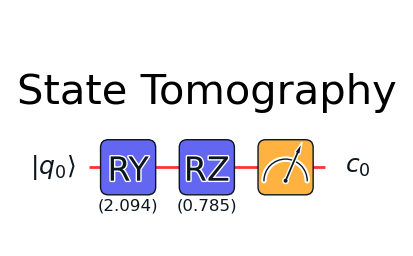

In [2]:
q=create_circuit(theta=2*pi/3, phi=pi/4)
q.plot_circuit("State Tomography")
sim_res = simulate(q,output="density_matrix")
print("The density matrix ρ of the quantum state is:",sim_res.rho,sep="\n")

When $\theta=\frac{2\pi}{3},\phi=\frac{\pi}{4}$, the quantum state is $|\psi\rangle =\frac{1}{2}|0\rangle + \frac{\sqrt{3}}{2}e^{i\frac{\pi}{4}}|1\rangle$, and the density matrix is $\rho = |\psi\rangle \langle\psi| = \begin{pmatrix} \frac{1}{4} & \frac{\sqrt{6}}{8}-\frac{\sqrt{6}}{8}i \\ \frac{\sqrt{6}}{8}+\frac{\sqrt{6}}{8}i & \frac{3}{4}\end{pmatrix}$, which is the same as the simulation result.

### 3.2. Create tasks

Define a function to create the demonstration task. It has three parameters, `theta`, `phi`, and `experimental`, where `theta` and `phi` are used to determine the corresponding parameters of the quantum state to be constructed, and `experimental` is used to choose whether to run on a real machine or simulator. The function will measure the qubit in the eigenstates of $X$, $Y$, $Z$ operators, respectively, and place the corresponding expectation values $\lambda_X$, $\lambda_Y$, $\lambda_Z$ in `obsexp`.   
The function has two return parameters, `obsexp` and `experimental`, which represent the three expectations and whether the operation is run on a real machine or simulator. Besides, if running on a real machine, the function will display the history of the task, which can be saved for later viewing.

In [3]:
def state_tomo(theta, phi, experimental: bool = False):
    base_name = ['X','Y','Z']  # Define the name of the measurement bases
    obsexp=[]  # To save the value of E(X), E(Y), E(Z)
    groupname="state_tomo"  # Name of group
    task = Task()  # Create and configure task
    task.config(backend="ScQ-P18", shots=2000, compile=True) # "ScQ-P10", "ScQ-P18", "ScQ-P136"
    if experimental:
        print("sending task...")
    for i in range(3):  # Measure quantum states with three different measurement bases
        qc = create_circuit(theta=theta, phi=phi, base=base_name[i])
        if experimental:
            res = task.send(qc, name=base_name[i], group=groupname)
            obsexp.append(res.calculate_obs([0]))
        else:
            simu_res = simulate(qc)
            obsexp.append(simu_res.calculate_obs([0]))
    if experimental:
        history=task.get_history()
        print("taskid：",history,"\n",sep="")  # Save the history to disk if you want to retrieve it next time
    return obsexp,experimental

Define the identity matrix and the Pauli matrices for later calculation.

In [4]:
I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])

### 3.3. Simulation result

By calling the `state_tomo` function and setting the `experimental` parameter to False, we can get the simulation result of expectation values $\lambda_X$, $\lambda_Y$, $\lambda_Z$. And by substituting these values into the equation $\rho=\frac{I}{2}+\frac{1}{2}\sum_{i=1}^3 \lambda_i \sigma_i $, we can get the density matrix of quantum states.

In [5]:
obsexp, experimental = state_tomo(theta=2*pi/3, phi=pi/4, experimental=False)
rho = (I + obsexp[0]*X + obsexp[1]*Y + obsexp[2]*Z)/2
print("According to the simulation result, λx = {:.6f}, λy = {:.6f}, λz = {:.6f}".format(*obsexp))
print("density matrix:","ρ = I/2 + (λx X +λy Y +λz Z)/2 = ",rho,sep="\n")

According to the simulation result, λx = 0.612372, λy = 0.612372, λz = -0.500000
density matrix:
ρ = I/2 + (λx X +λy Y +λz Z)/2 = 
[[0.25      +0.j         0.30618622-0.30618622j]
 [0.30618622+0.30618622j 0.75      +0.j        ]]


The density matrix obtained by quantum state tomography on the simulator is the same as the results obtained by direct calculations and simulations before.

### 3.4. Experimental result

By setting the `experimental` parameter to True, we can get results running on the real machine. And the history of the task will be shown.

In [6]:
obsexp, experimental = state_tomo(theta=2*pi/3, phi=pi/4, experimental=True)
rho = (I + obsexp[0]*X + obsexp[1]*Y + obsexp[2]*Z)/2
print("According to the experimental result, λx = {:.6f}, λy = {:.6f}, λz = {:.6f}".format(*obsexp))
print("density matrix:","ρ = I/2 + (λx X +λy Y +λz Z)/2 = ",rho,sep="\n")

sending task...
taskid：{'state_tomo': ['377FF6401DB40CB5', '377FF6C0050537A1', '377FF7302EA21C3E']}

According to the experimental result, λx = 0.638000, λy = 0.597000, λz = -0.520000
density matrix:
ρ = I/2 + (λx X +λy Y +λz Z)/2 = 
[[0.24 +0.j     0.319-0.2985j]
 [0.319+0.2985j 0.76 +0.j    ]]


It can be seen that the experimental results are very close to the theoretical values, and thus we have successfully demonstrated quantum state tomography of a single qubit.